<a href="https://colab.research.google.com/github/kcbharat100/Real-Time-Facial-Expression-Recognition-with-Deep-Learning/blob/master/RTFER_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kcbharat100/Real-Time-Facial-Expression-Recognition-with-Deep-Learning.git

Cloning into 'Real-Time-Facial-Expression-Recognition-with-Deep-Learning'...
remote: Enumerating objects: 34069, done.
remote: Counting objects: 100% (34069/34069), done.
remote: Compressing objects: 100% (34059/34059), done.
remote: Total 34069 (delta 8), reused 34068 (delta 7), pack-reused 0
Receiving objects: 100% (34069/34069), 52.45 MiB | 29.94 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (35887/35887), done.


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.3.0


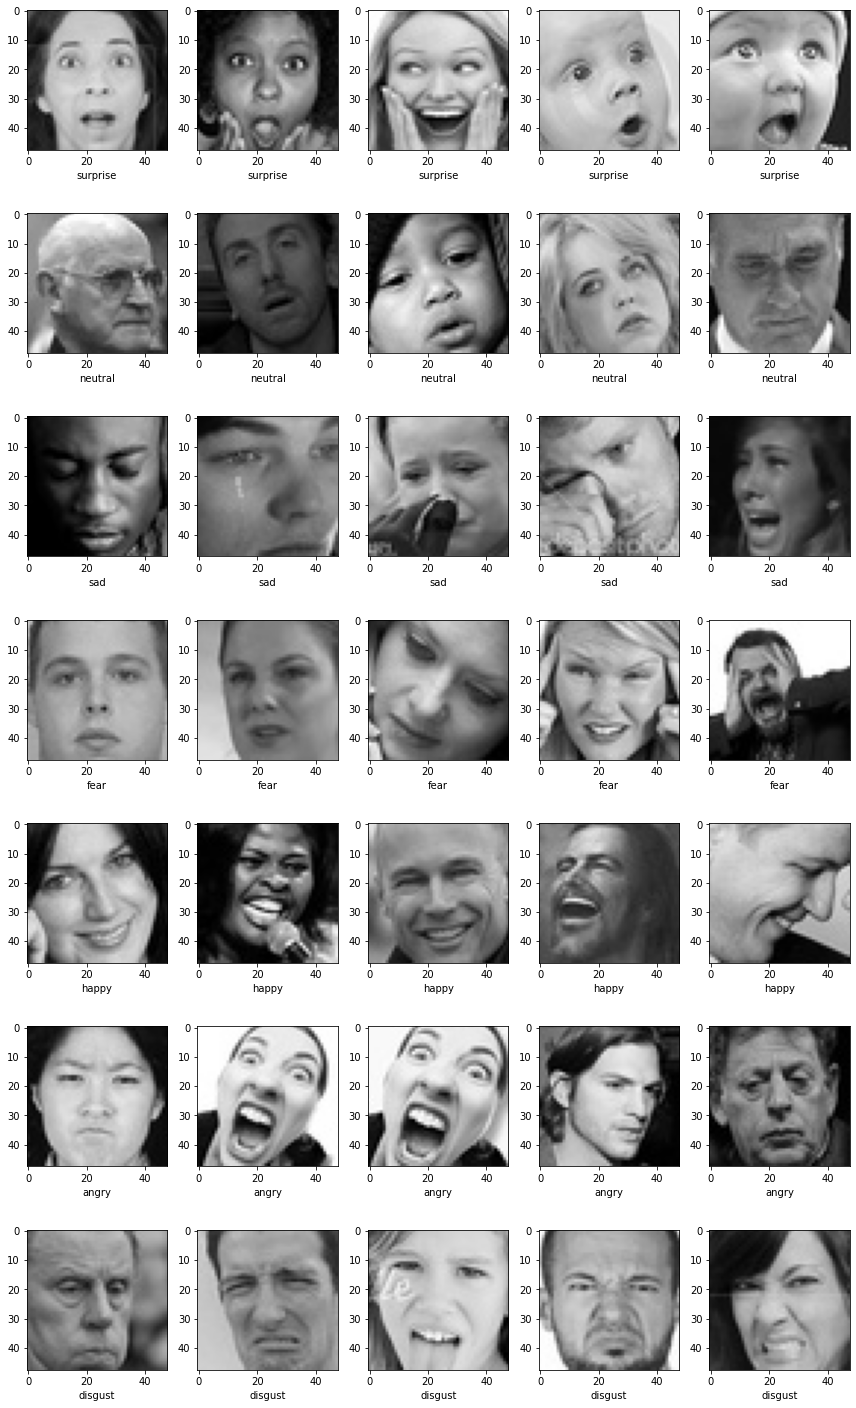

In [3]:
dir_train = "/content/Real-Time-Facial-Expression-Recognition-with-Deep-Learning/train/"
dir_test = "/content/Real-Time-Facial-Expression-Recognition-with-Deep-Learning/test/"


def plot_example_images(plt):
    img_size = 48
    plt.figure(0, figsize=(12,20))
    ctr = 0


    for expression in os.listdir(dir_train):
        for i in range(1,6):
            ctr += 1
            plt.subplot(7,5,ctr)
            img = load_img(dir_train + expression + "/" +os.listdir(dir_train + expression)[i], target_size=(img_size, img_size))
            plt.xlabel(expression)
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    return plt

plot_example_images(plt).show()

In [4]:
listDataSize = []
listExpression = []
for expression in os.listdir(dir_train):
    listDataSize.append(len(os.listdir(dir_train + expression)))
    listExpression.append(expression)
    print(str(len(os.listdir(dir_train + expression))) + " " + expression + " images")

3171 surprise images
4965 neutral images
4830 sad images
4097 fear images
7214 happy images
3995 angry images
436 disgust images


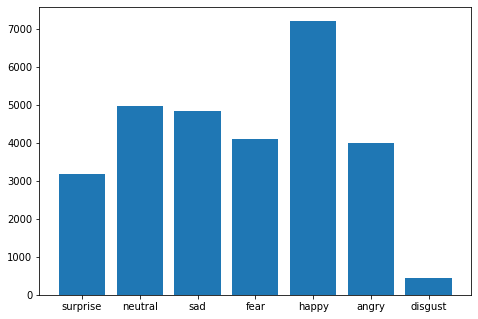

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = listExpression
students = listDataSize
ax.bar(langs,students)
plt.show()

In [6]:
# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(dir_train))
print(classes)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [7]:
img_size = 48
batch_size = 128

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(dir_train,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory(dir_test,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution layer 
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [9]:
# Train the model over 5 epochs
num_epochs = 20
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
224/224 [==============================] - 13s 58ms/step - loss: 1.8543 - accuracy: 0.2854 - val_loss: 1.7663 - val_accuracy: 0.3318
Epoch 2/20
224/224 [==============================] - 12s 56ms/step - loss: 1.5524 - accuracy: 0.4040 - val_loss: 1.4563 - val_accuracy: 0.4357
Epoch 3/20
224/224 [==============================] - 13s 56ms/step - loss: 1.3964 - accuracy: 0.4649 - val_loss: 1.3621 - val_accuracy: 0.4989
Epoch 4/20
224/224 [==============================] - 13s 56ms/step - loss: 1.2934 - accuracy: 0.5047 - val_loss: 1.2557 - val_accuracy: 0.5193
Epoch 5/20
224/224 [==============================] - 13s 56ms/step - loss: 1.2342 - accuracy: 0.5302 - val_loss: 1.2612 - val_accuracy: 0.5237
Epoch 6/20
224/224 [==============================] - 13s 56ms/step - loss: 1.1899 - accuracy: 0.5459 - val_loss: 1.1848 - val_accuracy: 0.5421
Epoch 7/20
224/224 [==============================] - 13s 56

In [10]:
# Evalution:

_, acc = model.evaluate_generator(train_generator, steps=train_generator.samples//batch_size +1, verbose = 0)
print('Train Accuracy: %.2f' % (acc * 100.0))

_, acc = model.evaluate_generator(validation_generator, steps=validation_generator.samples//batch_size +1, verbose = 0)
print('Validation Accuracy: %.2f' % (acc * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Train Accuracy: 70.72
Validation Accuracy: 61.79


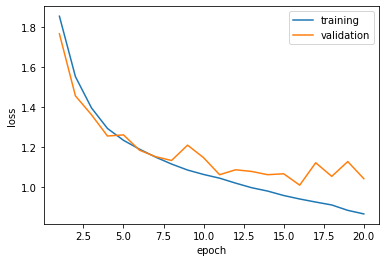

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Instructions for updating:
Please use Model.predict, which supports generators.


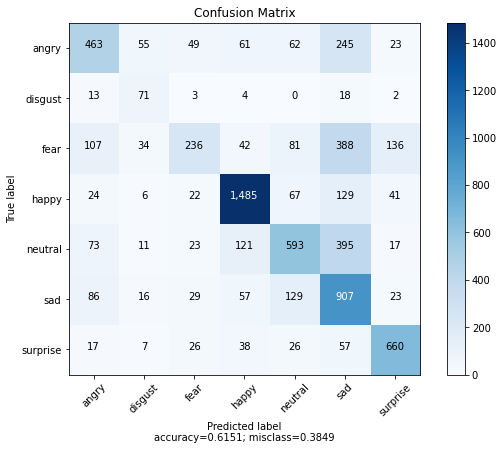

Classification Report:
              precision    recall  f1-score   support

       angry       0.59      0.48      0.53       958
     disgust       0.35      0.64      0.46       111
        fear       0.61      0.23      0.33      1024
       happy       0.82      0.84      0.83      1774
     neutral       0.62      0.48      0.54      1233
         sad       0.42      0.73      0.54      1247
    surprise       0.73      0.79      0.76       831

    accuracy                           0.62      7178
   macro avg       0.59      0.60      0.57      7178
weighted avg       0.64      0.62      0.60      7178



In [12]:
# Confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

test_steps_per_epoch = np.ceil(validation_generator.samples/validation_generator.batch_size)
Predictions = model.predict_generator(validation_generator, steps= test_steps_per_epoch, verbose=0)
predictions = Predictions.argmax(axis=1)
test_labels = validation_generator.classes
cm = confusion_matrix(test_labels, predictions)
cm_plot_labels = list(train_generator.class_indices)
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

print('Classification Report:')
target_names = list(train_generator.class_indices)
print(classification_report(validation_generator.classes, predictions, target_names=target_names))

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_weights.h5")
print("Saved model to disk")


Saved model to disk
